In [7]:
pip install pandas matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 1.0 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
import numpy as np
import os


/var/folders/w2/k3ld7k0j3tv758g2z5y4s6f80000gn/T/ipykernel_91992/4178646795.py:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [58]:
def smooth(scalars, weight):  # weight取值在0和1之间
    last = scalars[0]  # 序列第一个值
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # 计算平滑值
        smoothed.append(smoothed_val)
        last = smoothed_val  # 更新上一个平滑值
    return smoothed

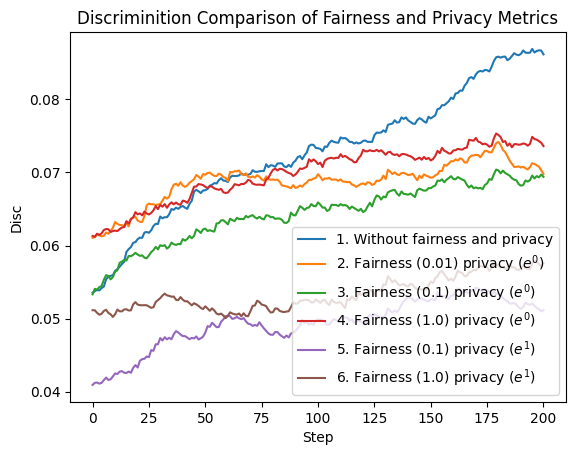

In [163]:
# 读取CSV文件并提取Value列
data_dir = os.path.expanduser('~/Desktop/paper/result/adult/fairness and privacy/disc/') # 存放CSV文件的文件夹路径，按需修改
data_frames = []
csv_filenames = []  # 新增列表用于存储CSV文件名
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]
csv_files.sort()  # 按文件名升序排序
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    value_column = df['Value']
    data_frames.append(value_column)
    csv_filenames.append(file[:-4]) 
# 数据平滑处理
smoothed_data = []
sigma = 15 # 平滑参数，可根据效果调整
smoothed_parameter = 0.99
for column in data_frames:
    # smoothed = gaussian_filter1d(column.values, sigma=sigma)
    smoothed = smooth(column.values, smoothed_parameter)  # 使用自定义平滑函数
    smoothed_data.append(smoothed)
# 绘制对比图片并输出
x = np.arange(len(smoothed_data[0]))  # 假设所有数据长度一致
for i, data in enumerate(smoothed_data):
    plt.plot(x, data, label=csv_filenames[i])  # 使用文件名作为label

plt.xlabel('Step')
plt.ylabel('Disc')
plt.title('Discriminition Comparison of Fairness and Privacy Metrics')
plt.legend()
plt.savefig(f'{data_dir}/Discrimination Comparison of Fairness and Privacy Metrics on Adult2')  # 保存为PNG格式图片，可按需改格式
plt.show()

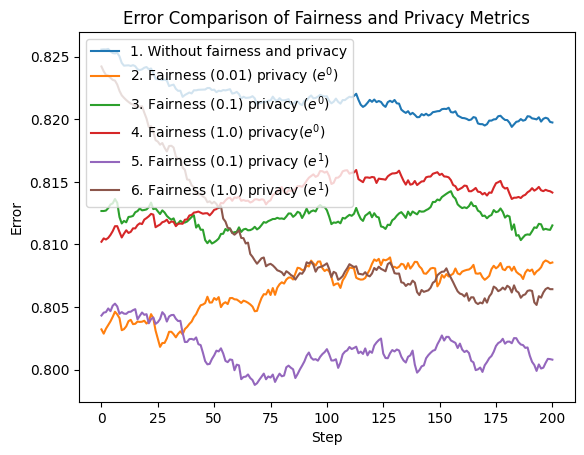

In [164]:
# 读取CSV文件并提取Value列
data_dir = os.path.expanduser('~/Desktop/paper/result/adult/fairness and privacy/error/') # 存放CSV文件的文件夹路径，按需修改
data_frames = []
csv_filenames = []  # 新增列表用于存储CSV文件名
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv')]
csv_files.sort()  # 按文件名升序排序
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    value_column = df['Value']
    data_frames.append(value_column)
    csv_filenames.append(file[:-4]) 


# 数据平滑处理
smoothed_data = []
# sigma = 1 # 平滑参数，可根据效果调整
smoothed_parameter = 0.98
for column in data_frames:
    # smoothed = gaussian_filter1d(column.values, sigma=sigma)
    smoothed = smooth(column.values, weight=smoothed_parameter)  # 使用自定义平滑函数
    smoothed_data.append(smoothed)
# 绘制对比图片并输出
x = np.arange(len(smoothed_data[0]))  # 假设所有数据长度一致
for i, data in enumerate(smoothed_data):
    plt.plot(x, data, label=csv_filenames[i])  # 使用文件名作为label

plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Error Comparison of Fairness and Privacy Metrics')
plt.legend()
plt.savefig(f'{data_dir}/Error Comparison of Fairness and Privacy Metrics on Adult2.png')  # 保存为PNG格式图片，可按需改格式
plt.show()